In [63]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [64]:
df_longe = pd.read_csv('nossa_longe.csv')
df_med = pd.read_csv('nossa_med.csv')
df_perto = pd.read_csv('nossa_perto.csv')

# Leituras do Giuliano
df_1 = pd.read_csv('leitura_1.csv')
df_2 = pd.read_csv('leitura_2.csv')

In [65]:
def create_hash(df):
    exp_read_list = {}
    for read, exp in zip(df['read'], df['expected']):
        if float(exp) in exp_read_list.keys():
            exp_read_list[float(exp)].append(float(read))
        else:
            exp_read_list[float(exp)] = []
            exp_read_list[float(exp)].append(float(read))
    return exp_read_list

In [66]:
hash_longe = create_hash(df_longe)
hash_med = create_hash(df_med)
hash_perto = create_hash(df_perto)
hash_giu1 = create_hash(df_1)
hash_giu2 = create_hash(df_2)

In [67]:
def calc_abs_errors(hash_df):
    errs = []
    for key in hash_df.keys():
        for read in hash_df[key]:
            errs.append(np.abs(key-read))
            
    return errs

In [68]:
errs_longe = calc_abs_errors(hash_longe)
errs_med = calc_abs_errors(hash_med)
errs_perto = calc_abs_errors(hash_perto)

In [69]:
def plot_normal(e, c):
    mu = np.mean(e)
    sigma = np.std(e)
    print("Media {}".format(mu))
    print("Desvio Padrao {}".format(sigma))
    bins = np.arange(-200, 200)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color=c)


Media 44.32939803402727
Desvio Padrao 56.218188671970424


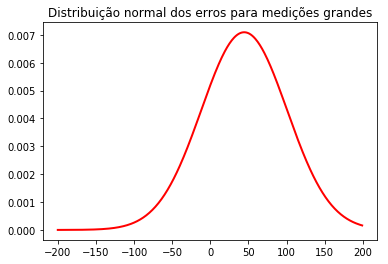

In [70]:
plt.title('Distribuição normal dos erros para medições grandes')
plot_normal(errs_longe, 'r')

Media 3.951275165264423
Desvio Padrao 1.2671355827389552


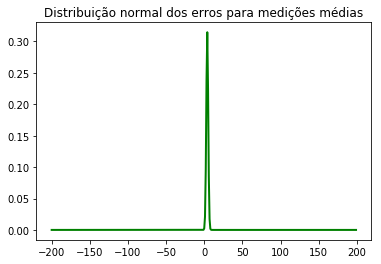

In [71]:
plt.title('Distribuição normal dos erros para medições médias')
plot_normal(errs_med, 'g')

Media 14.226672968153137
Desvio Padrao 25.13857374346723


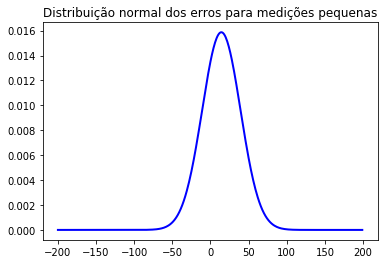

In [72]:
plt.title('Distribuição normal dos erros para medições pequenas')
plot_normal(errs_perto, 'b')

Text(0.5,1,'Distribuição de todos os erros')

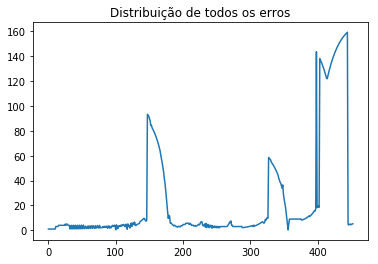

In [73]:
total_errs = errs_perto + errs_med + errs_longe

plt.plot(total_errs)
plt.title("Distribuição de todos os erros")

In [75]:
frames = [df_longe, df_med, df_perto, df_1, df_2]
all_df = pd.concat(frames)
hash_all = create_hash(all_df)

In [76]:
def measures_and_probabilities(expected_interval, hash_all):
    keys = hash_all.keys()
    min_dist = np.inf
    reads = []
    for k in keys:
        if k >= expected_interval[0] and k <= expected_interval[1]:
            reads += hash_all[k]
                
    
    value_p = {}
    N = len(reads)
    
    for r in reads:
        if r not in value_p.keys():
            value_p[r] = reads.count(r)/N
            
    return sorted(value_p.items(), key=lambda x:x[1])


In [77]:
def plot_bar_probs(mp):
    x = []
    y = []
    for t in mp:
        x.append(t[0])
        y.append(t[1])
    
    
    width = 1/1.5
    plt.bar(x, y, width, color="blue")

    print(x)
    print(y)

In [78]:
INTERVALO = [25, 30]
m_and_p = measures_and_probabilities(INTERVALO, hash_all)

[27.0, 29.0, 30.0, 19.0, 28.0, 255.0, 26.0, 20.0, 25.0, 21.0, 23.0, 24.0, 22.0]
[0.0031746031746031746, 0.0031746031746031746, 0.0031746031746031746, 0.0031746031746031746, 0.0031746031746031746, 0.0031746031746031746, 0.009523809523809525, 0.01904761904761905, 0.050793650793650794, 0.09841269841269841, 0.2507936507936508, 0.2634920634920635, 0.28888888888888886]


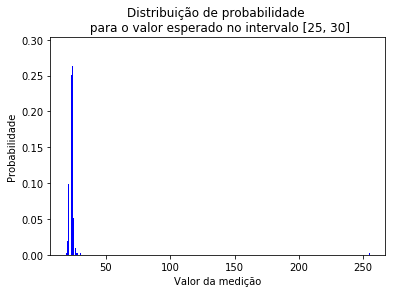

In [79]:
plt.title('Distribuição de probabilidade \n para o valor esperado no intervalo [25, 30]')
plt.xlabel('Valor da medição')
plt.ylabel('Probabilidade')
plot_bar_probs(m_and_p)

Index(['ang10', 'ang11', 'ang12', 'ang13', 'ang14', 'ang15', 'ang16', 'ang17',
       'ang18', 'ang19', 'ang20', 'ang21', 'ang22', 'ang23', 'ang24', 'ang25'],
      dtype='object')
16
15


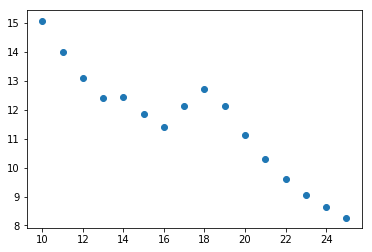

In [80]:
df = pd.read_csv('emquad.csv')
print(df.keys())
filtered = df[df < 100]
sums = np.sum(filtered)

for i in range(len(filtered.keys())):
    k = filtered.keys()[i]
    N = len(filtered[filtered[k].notnull()][k])
    #print("N {}".format(N))
    #print(sums[k])
    #print(sums[k]/N)
    #print("----------------")
    sums[k] = sums[k]/N
    
y = sums.values
print(len(y))
print(len(np.arange(10,25)))
plt.scatter(np.arange(10, 26), y)
#print(df[df['ang10'] > 10]['ang10'])